# Problem 2

## Commercial Bank Failures, 1934-Present
## Every bank failure in the United States since the Great Depression

Source: https://www.kaggle.com/fdic/bank-failures

*Content*

This report lists each failure of a commercial bank, savings association, and savings bank since the establishment of the FDIC in 1933. Each record includes the institution name and FIN number, institution and charter types, location of headquarters (city and state), effective date, insurance fund and certificate number, failure transaction type, total deposits and total assets last reported prior to failure (in thousands of dollars), and the estimated cost of resolution. Data on estimated losses are not available for FDIC insured failures prior to 1986 or for FSLIC insured failures from 1934-88.

In [1]:
import pandas as pd

In [2]:
# Uncomment below and run the cell
#from google.colab import drive
#drive.mount('/content/drive/')

In [3]:
# Uncomment below and run the cell - leave % as the first character, as %cd drive/My\ Drive
# %cd drive/My\ Drive

In [4]:
data = pd.read_csv("banks.csv")
data.rename(columns={data.columns[-1]:'Losses'}, inplace=True)

In [5]:
data.head()

,Institution Name,Institution Type,Charter Type,Headquarters,Failure Date,Insurance Fund,Transaction Type,Total Deposits,Total Assets,Losses
0,INDYMAC BANK F.S.B,SAVINGS BANK,STATE,"PASADENA, CA",7/11/2008,DIF,ACQUISITION,18941727,30698512.0,12438005.0
1,"BANKUNITED, FSB",SAVINGS BANK,STATE,"CORAL GABLES, FL",5/21/2009,DIF,ACQUISITION,8775985,13111463.0,5274515.0
2,COLONIAL BANK,COMMERCIAL BANK,STATE,"MONTGOMERY, AL",8/14/2009,DIF,ACQUISITION,20072099,25455112.0,3330263.0
3,LINCOLN SAVINGS & LOAN,SAVINGS ASSOCIATION,FEDERAL/STATE,"IRVINE, CA",4/14/1989,RTC,ACQUISITION,4193981,4857204.0,3142552.0
4,OAKTREE FEDERAL SAVINGS,SAVINGS ASSOCIATION,FEDERAL/STATE,"NEW ORLEANS, LA",10/13/1991,RTC,ACQUISITION,2256189,2214549.0,2345947.0


## Q2.1 Can you confirm the claim below regarding Washington Mutual, as the biggest failure in assets of U.S. history? Show the full record of the bank from the database.

During the 2007-2008 financial crisis, **the biggest bank failure in U.S. history occurred when Washington Mutual, with 307 billion in assets, closed its doors**. Another large bank failure had occurred just a few months earlier when IndyMac was seized. The second all-time largest closure was the $40 billion failure of Continental Illinois in 1984. The FDIC maintains an up-to-date list of failed banks on its website. (Source: https://www.investopedia.com/terms/b/bank-failure.asp)

**Mark**: 1 line (max 2 lines), 2 pnts   

In [6]:
data.loc[data['Total Assets'].idxmax()] # Just that! 

Institution Name    WASHINGTON MUTUAL BANK
Institution Type              SAVINGS BANK
Charter Type                         STATE
Headquarters                 HENDERSON, NV
Failure Date                    9/25/2008 
Insurance Fund                         DIF
Transaction Type               ACQUISITION
Total Deposits                   188260793
Total Assets                   3.07022e+08
Losses                                   0
Name: 2495, dtype: object

## Q2.2 Create a column "State", showing the State Abbreviation (PA, IL, etc) where the bank headquater is located.

**Mark**: 1 line, 2 pnts   
**Hints**: be carefull about spaces  

In [7]:
# This is my original solution. I discover later that a line (Hawai) has two commas
data['State'] = [s.split(", ")[1] for s in data.Headquarters]

In [8]:
data['State'] = data.Headquarters.str[-2:] # safer; with many variants, off course

In [9]:
data.tail()

,Institution Name,Institution Type,Charter Type,Headquarters,Failure Date,Insurance Fund,Transaction Type,Total Deposits,Total Assets,Losses,State
3479,FIRST CORNERSTONE BANK,COMMERCIAL BANK,STATE,"KING OF PRUSSIA, PA",5/6/2016,DIF,ACQUISITION,101040,103307.0,NaN,PA
3480,THE WOODBURY BANKING COMPANY,COMMERCIAL BANK,STATE,"WOODBURY, GA",8/19/2016,DIF,ACQUISITION,21122,21426.0,NaN,GA
3481,ALLIED BANK,COMMERCIAL BANK,STATE,"MULBERRY, AR",9/23/2016,DIF,ACQUISITION,64713,66336.0,NaN,AR
3482,HARVEST COMMUNITY BANK,COMMERCIAL BANK,STATE,"PENNSVILLE, NJ",1/13/2017,DIF,ACQUISITION,123817,126430.0,NaN,NJ
3483,SEAWAY BANK AND TRUST COMPANY,COMMERCIAL BANK,STATE,"CHICAGO, IL",1/27/2017,DIF,ACQUISITION,307118,361197.0,NaN,IL


## Q2.3 Show a table with the number of banks for each combination of Institutional and Charter type (i.e. rows as Institutional and cols as Charter types)

**Mark**: 1 line, 2 pnts   

In [10]:
data.groupby(['Institution Type', 'Charter Type']).size().unstack()

Charter Type,FEDERAL,FEDERAL/STATE,STATE
Institution Type,,,
COMMERCIAL BANK,760.0,NaN,1705.0
SAVINGS ASSOCIATION,NaN,691.0,NaN
SAVINGS BANK,NaN,NaN,328.0


## Warning! .count() and size() have different meanings!

Count tells the number of rows, and for all the columns!  
Size really counts how many elements match them both.   
By the way, here it does not make too much difference, but in other cases it does

In [13]:
data.groupby(['Institution Type', 'Charter Type']).count().unstack()

Institution Name                       Headquarters  \
Charter Type                 FEDERAL FEDERAL/STATE   STATE      FEDERAL   
Institution Type                                                          
COMMERCIAL BANK                760.0           NaN  1705.0        760.0   
SAVINGS ASSOCIATION              NaN         691.0     NaN          NaN   
SAVINGS BANK                     NaN           NaN   328.0          NaN   

                                          Failure Date                        \
Charter Type        FEDERAL/STATE   STATE      FEDERAL FEDERAL/STATE   STATE   
Institution Type                                                               
COMMERCIAL BANK               NaN  1705.0        760.0           NaN  1705.0   
SAVINGS ASSOCIATION         691.0     NaN          NaN         691.0     NaN   
SAVINGS BANK                  NaN   328.0          NaN           NaN   328.0   

                    Insurance Fund  ... Total Deposits Total Assets  \
Charter Type               FEDERAL  ...          STATE      FEDERAL   
Institution Type                    ...                               
COMMERCIAL BANK              760.0  ...         1705.0        717.0   
SAVINGS ASSOCIATION            NaN  ...            NaN          NaN   
SAVINGS BANK                   NaN  ...          328.0          NaN   

                                           Losses                        \
Charter Type        FEDERAL/STATE   STATE FEDERAL FEDERAL/STATE   STATE   
Institution Type                                                          
COMMERCIAL BANK               NaN  1598.0   590.0           NaN  1029.0   
SAVINGS ASSOCIATION         691.0     NaN     NaN         572.0     NaN   
SAVINGS BANK                  NaN   327.0     NaN           NaN   318.0   

                      State                        
Charter Type        FEDERAL FEDERAL/STATE   STATE  
Institution Type                                   
COMMERCIAL BANK       760.0           NaN  1705.0  
SAVINGS ASSOCIATION     NaN         691.0     NaN  
SAVINGS BANK            NaN           NaN   328.0  

[3 rows x 27 columns]

## Q2.4 How strong is the correlation between the assets and the deposits?

**Mark**: 1 line, 2 pnts   

In [14]:
data['Total Assets'].corr(data['Total Deposits'])

0.9981407608338189

## Q2.5 Plot the number of failured banks for each State, as vertical bars

**Mark**: 1 line, 2 pnts   

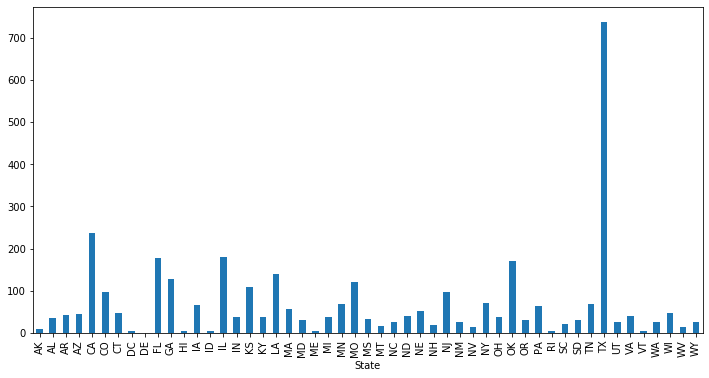

In [15]:
data.groupby("State").size().plot(kind='bar', figsize=(12,6));

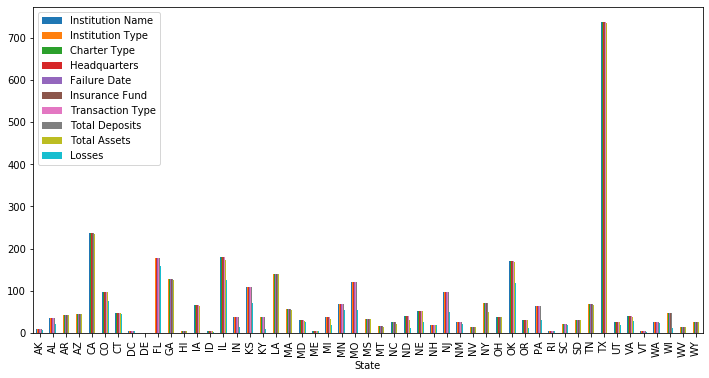

In [18]:
data.groupby("State").count().plot(kind='bar', figsize=(12,6)); # This is wrong (note: count())

## Q2.6 Consider the number of failures occured each year and also the total losses for the same years. Plot them both as vertical bars on different figures.

## Did their maximum values occure at the same time?

**Mark**: free numnber of lines/cells, ***5 pnts***  
**Hint**: set the figure size to something wide like (20,6)  

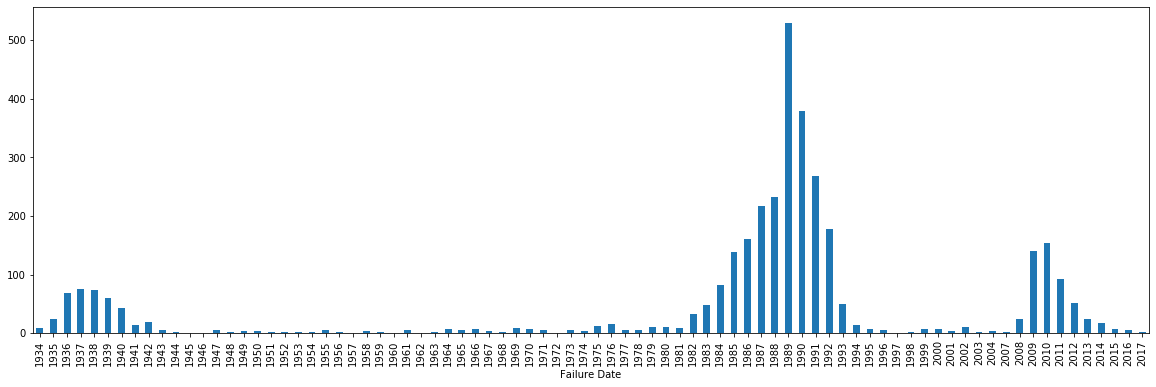

In [22]:
failures_per_year = data.groupby(pd.to_datetime(data['Failure Date']).dt.year).size() 
failures_per_year.plot(kind='bar', figsize=(20,6));

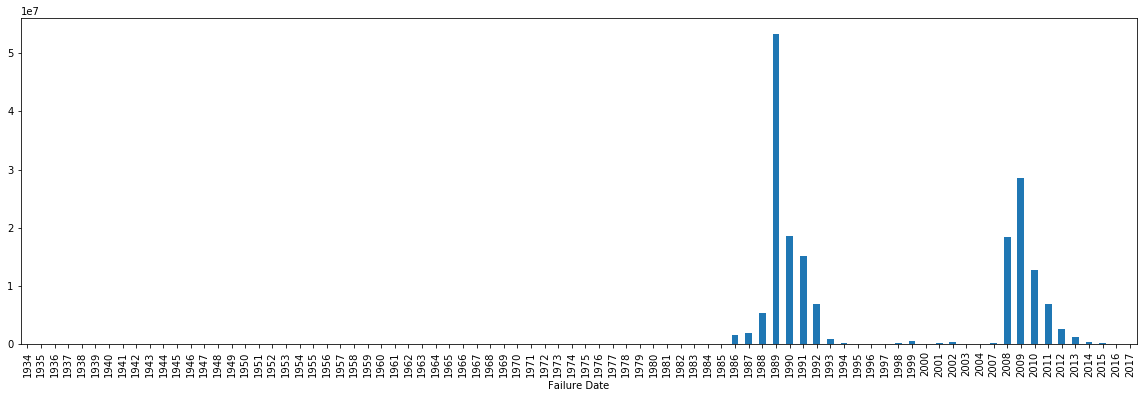

In [23]:
losses_per_year = data.groupby(pd.to_datetime(data['Failure Date']).dt.year).Losses.sum()
losses_per_year.plot(kind='bar', figsize=(20,6));

In [24]:
losses_per_year.idxmax() == failures_per_year.idxmax() # The max is at the same year

True